# 2)

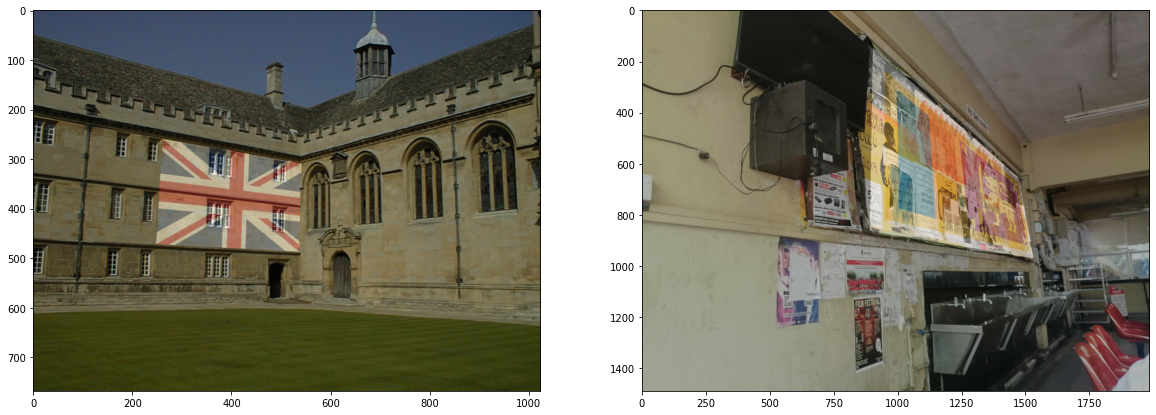

'\nhttps://www.etutorialspoint.com/index.php/319-python-opencv-overlaying-or-blending-two-images\nhttps://learnopencv.com/homography-examples-using-opencv-python-c/\nhttps://theailearner.com/tag/cv2-warpperspective/\nhttps://towardsdatascience.com/image-processing-with-python-applying-homography-for-image-warping-84cd87d2108f\n\n'

In [51]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random


#load images 
flag = cv.cvtColor(cv.imread(r'Images\Flag_of_the_United_Kingdom.png'), cv.COLOR_BGR2RGB)
wall = cv.cvtColor(cv.imread(r'Images\002.jpg'), cv.COLOR_BGR2RGB)

flag2 = cv.cvtColor(cv.imread(r'Images\sl_flag.png'), cv.COLOR_BGR2RGB)
wall2 = cv.cvtColor(cv.imread(r'Images\Wall 2.jpeg'), cv.COLOR_BGR2RGB)

# interesting points
flag_pts = np.array([[0,0],[383,0],[383,192],[0,192]])
wall_pts = np.array([[261,260],[541,308],[536,487],[248,472]])

flag2_pts = np.array([[0,0],[860,0],[860,470],[0,470]])
wall2_pts = np.array([[902,148],[1472,656],[1530,970],[890,863]])


def get_projection(wall,flag,wall_pts,flag_pts):
    # getting homofraphy
    h, status = cv.findHomography(flag_pts, wall_pts)

    # get transformed image
    transformed_img =  cv.warpPerspective(flag, h,(wall.shape[1],wall.shape[0]))

    #blending images
    blended =cv.addWeighted(wall, 0.7, transformed_img,0.3,0)

    return blended

#show
fig, ax = plt.subplots(1,2,figsize = (20,20))
ax[0].imshow(get_projection(wall,flag,wall_pts,flag_pts))
ax[1].imshow(get_projection(wall2,flag2,wall2_pts,flag2_pts)) 
plt.show()

#reference
"""
https://www.etutorialspoint.com/index.php/319-python-opencv-overlaying-or-blending-two-images
https://learnopencv.com/homography-examples-using-opencv-python-c/
https://theailearner.com/tag/cv2-warpperspective/
https://towardsdatascience.com/image-processing-with-python-applying-homography-for-image-warping-84cd87d2108f

"""



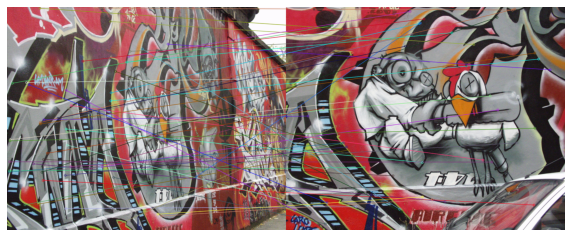

'Reference\n\nhttps://towardsdatascience.com/understanding-homography-a-k-a-perspective-transformation-cacaed5ca17'

In [131]:
img1 = cv.cvtColor(cv.imread(r'graf\img5.ppm'), cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(cv.imread(r'graf\img1.ppm'), cv.COLOR_BGR2RGB)

#geting key points
sift = cv.SIFT_create()
keypoints_1,  desctriptor_1 = sift.detectAndCompute(img1, None)
keypoints_2,  desctriptor_2 = sift.detectAndCompute(img2, None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck = True)

matches = bf.match(desctriptor_1,desctriptor_2)
matches = sorted(matches, key = lambda x:x.distance)

fig, ax = plt.subplots(figsize =(10,10))
ax.axis('off')
img_matches = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img_matches)
plt.show()

"""Reference

https://towardsdatascience.com/understanding-homography-a-k-a-perspective-transformation-cacaed5ca17"""



Each keypoint has 128 descriptors. 16 x 16 neighbourhood is selected around a keypoint depending on the scale. It is devided into 16, 4 by 4 sub blockes. From each sub block, 8 bin orientation histogram is created for each block.  
So there are 128 diferent values for a one keypoint as the descriptor.

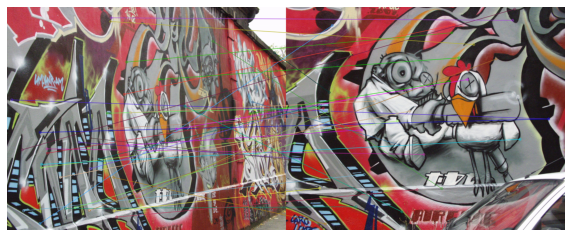

'print(type(desctriptor_1[0]))\nprint(len(keypoints_1))\nprint(len(desctriptor_1[0]))\nprint(desctriptor_1[0]) '

In [133]:
img1 = cv.cvtColor(cv.imread(r'graf\img5.ppm'), cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(cv.imread(r'graf\img1.ppm'), cv.COLOR_BGR2RGB)

def get_matching_points(img1, img2, match_percentage):

    #geting key points
    sift = cv.SIFT_create()
    keypoints_1, desctriptor_1 = sift.detectAndCompute(img1, None)
    keypoints_2, desctriptor_2 = sift.detectAndCompute(img2, None)
    #matching
    bf = cv.BFMatcher()
    matches = bf.knnMatch(desctriptor_1,desctriptor_2, k=2)
    
    #get best matches
    best_matches =[]

    """referance
    https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html"""

    for m,n in matches:
        if m.distance < match_percentage*n.distance:
            best_matches.append(m)
    #get matching keypoints
    """https://stackoverflow.com/questions/30716610/how-to-get-pixel-coordinates-from-feature-matching-in-opencv-python"""
    pset_1= np.zeros((len(best_matches),2), dtype = np.float32)
    pset_2= np.zeros((len(best_matches),2), dtype = np.float32)

    for i, match in enumerate(best_matches):
        pset_1[i,:] = keypoints_1[match.queryIdx].pt
        pset_2[i,:] = keypoints_2[match.trainIdx].pt
    
    return [np.concatenate((pset_1,pset_2),axis =1),best_matches] # first 2 columns are the x, y of image 1, second 2 columns are the matching x,y of image 2

best_matches= get_matching_points(img1,img2,0.7)[1]

fig, ax = plt.subplots(figsize =(10,10))
ax.axis('off')
img_matches = cv.drawMatches(img1, keypoints_1, img2, keypoints_2,best_matches, img2, flags=2)
plt.imshow(img_matches)
plt.show()

"""print(type(desctriptor_1[0]))
print(len(keypoints_1))
print(len(desctriptor_1[0]))
print(desctriptor_1[0]) """

In [134]:
def get_homography_matrix(mat):
    source = np.array([mat[:,0],mat[:,1]]).transpose()
    destination = np.array([mat[:,2],mat[:,3]]).transpose()
    assert len(source) == len(destination) # source points and destination points must be equal

    A =[]
    B =[]
    for i in range(len(source)):
        x_s , y_s = source[i]
        x_d , y_d = destination[i]
        A.append([x_s, y_s,1,0,0,0, (-x_d)*(x_s), (-x_d)*(y_s)])
        A.append([0,0,0, x_s,y_s,1 ,(-y_d)*(x_s), (-y_d)*(y_s)])
        B+= [x_d, y_d]

    A=np.array(A)
    h= np.linalg.lstsq(A,B)[0]  # least square solution
    h= np.concatenate((h,[1]), axis = -1)
    return np.reshape(h,(3,3))
    
"""

def get_homography_matrix(correspondences):
    Lst = []
    for corr in correspondences:
        p1 = np.matrix([corr.item(0), corr.item(1), 1])
        p2 = np.matrix([corr.item(2), corr.item(3), 1])
        a2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
        a1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
        Lst.append(a1)
        Lst.append(a2)
    matrixA = np.matrix(Lst)
    #svd composition
    u, s, v = np.linalg.svd(matrixA)
    h = np.reshape(v[8], (3, 3))
    h = (1/h.item(8)) * h
    return h"""

def get_matching_points(img1, img2, match_percentage):

    #geting key points
    sift = cv.SIFT_create()
    keypoints_1, desctriptor_1 = sift.detectAndCompute(img1, None)
    keypoints_2, desctriptor_2 = sift.detectAndCompute(img2, None)
    #matching
    bf = cv.BFMatcher()
    matches = bf.knnMatch(desctriptor_1,desctriptor_2, k=2)
    
    #get best matches
    best_matches =[]

    """referance
    https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html"""

    for m,n in matches:
        if m.distance < match_percentage*n.distance:
            best_matches.append(m)
    #get matching keypoints
    """https://stackoverflow.com/questions/30716610/how-to-get-pixel-coordinates-from-feature-matching-in-opencv-python"""
    pset_1= np.zeros((len(best_matches),2), dtype = np.float32)
    pset_2= np.zeros((len(best_matches),2), dtype = np.float32)

    for i, match in enumerate(best_matches):
        pset_1[i,:] = keypoints_1[match.queryIdx].pt
        pset_2[i,:] = keypoints_2[match.trainIdx].pt
    #print (np.concatenate((pset_1,pset_2),axis =1))
    return [np.concatenate((pset_1,pset_2),axis =1),best_matches] # first 2 columns are the x, y of image 1, second 2 columns are the matching x,y of image 2

def error(matched_points, h): 
    #point1 = np.transpose(np.matrix([matched_points[0].item(0), matched_points[0].item(1), 1]))
    #point2 = np.transpose(np.matrix([matched_points[0].item(2), matched_points[0].item(3), 1]))
    point1 = np.array([matched_points[0],matched_points[1],1]).transpose()
    point2 = np.array([matched_points[2],matched_points[3],1]).transpose()

    # Estimate the point after applying the homography
    transformed_point2 = np.dot(h, point1)
    transformed_point2 = (1/transformed_point2.item(2))*transformed_point2

    # Calculate the error between the actual and estimated point
    error = point2 - transformed_point2
    
    return np.linalg.norm(error)

def ransac_homography(best_matches_matrix): #first 2 in a row is from img1, othere 2 from img 2 
    #best_matches_matrix= np.matrix(best_matches_matrix)
    max_inliers =0
    best_homo =None
    best_points= None
    for i in range(20):
        random_ind = random.sample([i for i in range(len(best_matches_matrix))],4)
        random_points = np.array([best_matches_matrix[i,:] for i in random_ind])
       # print(random_points)
        #homography
        h = get_homography_matrix(random_points)
        inlier_num=0

        #get inliers
        for i in range(len(best_matches_matrix)):
            er= error(best_matches_matrix[i],h)
            if er <3:
                inlier_num+=1
        if inlier_num> max_inliers:
            max_inliers= inlier_num
            best_h =h
            best_points = random_points
    return [best_h,random_points]



C:\Users\Lathika\AppData\Local\Temp\ipykernel_3188\1214396301.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  h= np.linalg.lstsq(A,B)[0]  # least square solution


[[ 3.77758604e-01 -1.46572189e+00  5.59759814e+02]
 [ 1.89852218e-01 -8.33366614e-01  2.94376938e+02]
 [ 9.97455977e-04 -2.92982247e-03  1.00000000e+00]]
[[ 1.00000000e+00  2.24450578e-12 -8.61438056e-10]
 [-6.53186041e-13  1.00000000e+00 -3.86733949e-10]
 [-2.12965414e-15  3.25452950e-15  1.00000000e+00]]


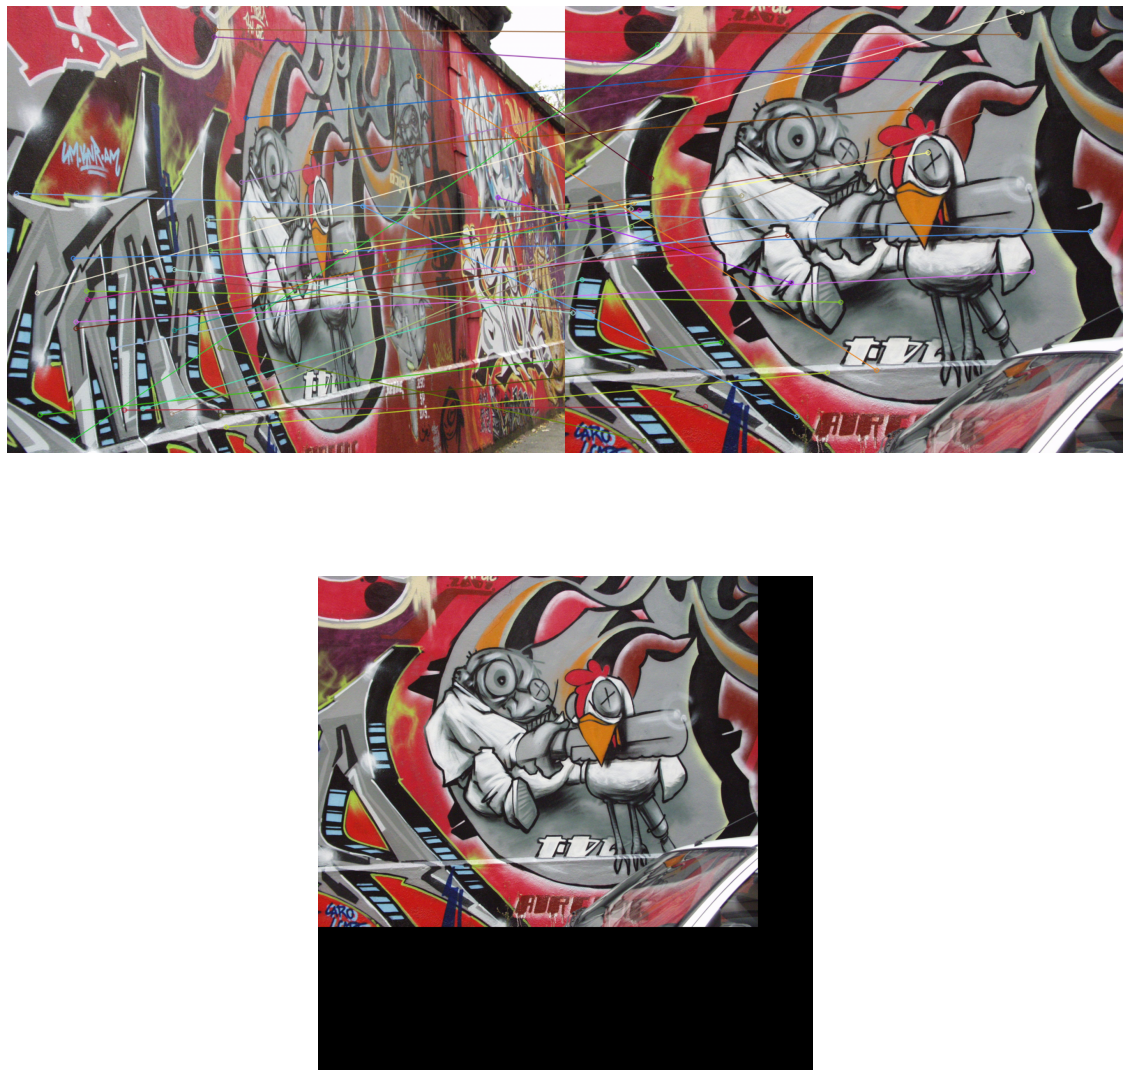

In [137]:
img1 = cv.cvtColor(cv.imread(r'graf\img5.ppm'), cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(cv.imread(r'graf\img1.ppm'), cv.COLOR_BGR2RGB)

best_matches= get_matching_points(img1,img2,0.7)
best_homography, best_points=ransac_homography(best_matches[0])

img1_p= np.array([[best_points[0][0],best_points[0][1]],[best_points[1][0],best_points[1][1]],[best_points[2][0],best_points[2][1]],[best_points[3][0],best_points[3][1]]])
img2_p= np.array([[best_points[0][2],best_points[0][3]],[best_points[1][2],best_points[1][3]],[best_points[2][2],best_points[2][3]],[best_points[3][2],best_points[3][3]]])
h, status = cv.findHomography(img1_p,img1_p)

print(best_homography)
print(h)

height, width =900,900 #img1.shape --> (640, 800, 3)
img_transformed_1 = cv.warpPerspective(img1, np.array([[ 1.00000000e+00,3.69560298e-16,0.00000000e+00],[-7.22195662e-16,1.00000000e+00,1.96911379e-13],[-2.45732924e-18,2.28191345e-19,1.00000000e+00]]),(height, width))
img_transformed = cv.warpPerspective(img2, h,(height, width))
blended =cv.addWeighted(img_transformed_1, 0.5, img_transformed,0.5,0)

fig, ax = plt.subplots(2,1,figsize =(20,20))
ax[0].axis('off')
ax[1].axis('off')
img_matches = cv.drawMatches(img1, keypoints_1, img2, keypoints_2,best_matches[1], img2, flags=2)
ax[0].imshow(img_matches)
ax[1].imshow(img_transformed)
plt.show()

In [113]:
print(np.ones((2,2)))


[[1. 1.]
 [1. 1.]]
